# Import Libraries

In [5]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

sns.set()

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("averaged_perceptron_tagger")
nltk.download("averaged_perceptron_tagger_eng")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stephenhelvig/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stephenhelvig/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/stephenhelvig/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/stephenhelvig/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/stephenhelvig/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

# Paths

In [6]:
from pathlib import Path

# Works whether you run the notebook from /notebooks or from the project root
CWD = Path.cwd()
ROOT = CWD.parent if CWD.name == "notebooks" else CWD

DATA = ROOT / "data"
OUT = ROOT / "outputs"

DATA.mkdir(exist_ok=True)
OUT.mkdir(exist_ok=True)

TEXT_PATH = DATA / "20th_century_key_events_clean.txt"
COUNTRIES_PATH = DATA / "simplewiki_countries.csv"

# Load Text and Tokenize

In [3]:
data = TEXT_PATH.read_text(errors="ignore").replace("\n", " ")

len(data), data[:400]

(64965,
 "The 20th century changed the world in unprecedented ways. The World Wars sparked tension between countries and led to the creation of atomic bombs , the Cold War led to the space race and the creation of space-based rockets, and the World Wide Web was created. These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today. The new beginning o")

In [18]:
tokenized_word = word_tokenize(data)

dist_words = FreqDist(tokenized_word)
dist_words.most_common(10)

[('the', 922),
 (',', 698),
 ('.', 440),
 ('of', 427),
 ('and', 329),
 ('to', 293),
 ('in', 241),
 ('a', 167),
 ('was', 132),
 ('The', 122)]

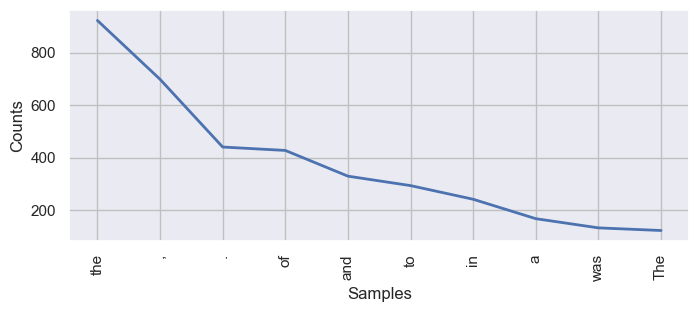

In [17]:
plt.figure(figsize=(8, 3))
dist_words.plot(10, cumulative=False)
plt.show()

In [16]:
# Remove stopwords
stop_words = set(stopwords.words("english"))

filtered_words = []
for w in tokenized_word:
    if w.lower() not in stop_words:
        filtered_words.append(w)

dist_words_filter = FreqDist(filtered_words)
dist_words_filter.most_common(10)

[(',', 698),
 ('.', 440),
 ('war', 67),
 ("'s", 46),
 ('Soviet', 46),
 ('(', 43),
 (')', 43),
 ('War', 41),
 ('Hitler', 40),
 ('``', 38)]

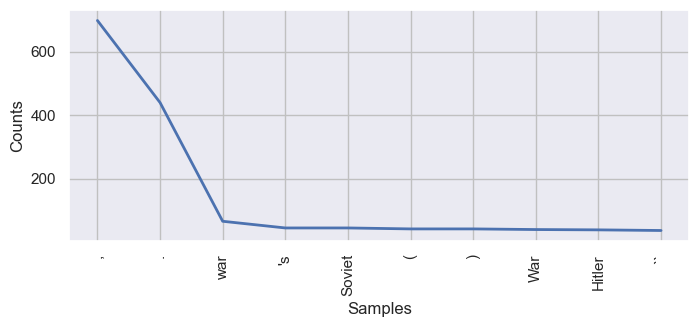

In [15]:
plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative=False)
plt.show()

In [14]:
# remove punctuation 

sans_punc = re.sub("[^a-zA-Z]", " ", str(filtered_words))
tokenized_word_2 = word_tokenize(sans_punc)

dist_words_filter_2 = FreqDist(tokenized_word_2)
dist_words_filter_2.most_common(10)

[('war', 73),
 ('s', 60),
 ('Soviet', 49),
 ('War', 41),
 ('Hitler', 40),
 ('would', 34),
 ('first', 33),
 ('world', 31),
 ('Germany', 31),
 ('became', 29)]

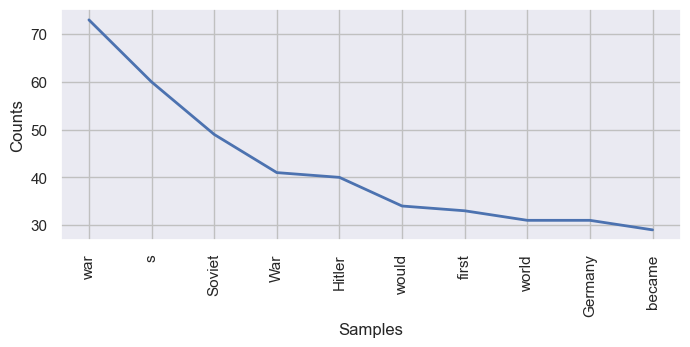

In [13]:
plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(10, cumulative=False)
plt.show()

In [19]:
# Drop single-letter tokens

tokenized_word_2_clean = [w for w in tokenized_word_2 if len(w) > 1]
dist_words_filter_2 = FreqDist(tokenized_word_2_clean)
dist_words_filter_2.most_common(10)

[('war', 73),
 ('Soviet', 49),
 ('War', 41),
 ('Hitler', 40),
 ('would', 34),
 ('first', 33),
 ('world', 31),
 ('Germany', 31),
 ('became', 29),
 ('Japanese', 29)]

In [20]:
# Normalize case (so war and War aren't counted separately)

tokenized_word_2_clean = [w.lower() for w in tokenized_word_2 if len(w) > 1]
dist_words_filter_2 = FreqDist(tokenized_word_2_clean)
dist_words_filter_2.most_common(10)

[('war', 114),
 ('world', 56),
 ('soviet', 49),
 ('hitler', 40),
 ('first', 36),
 ('would', 34),
 ('new', 31),
 ('germany', 31),
 ('states', 29),
 ('became', 29)]

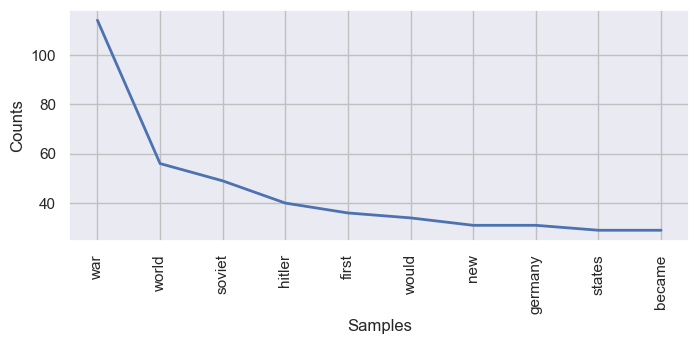

In [21]:
plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(10, cumulative=False)
plt.show()

# Comments
Looks much better. I added a few extra filters to remove single-letter tokens and normalize case. The 10 top most frequently used words make perfect sense for the text we're analyzing. 

In [23]:
# adding to my stopwords

extra_stop = {"s", "t", "n", "th"}
tokenized_word_2_clean = [
    w.lower() for w in tokenized_word_2
    if len(w) > 1 and w.lower() not in extra_stop
]

# Create a TextBlob object and tags list

In [24]:
text = TextBlob(" ".join(tokenized_word_2_clean))
tags_list = text.tags
tags_list[:20]

[('century', 'NN'),
 ('changed', 'VBD'),
 ('world', 'NN'),
 ('unprecedented', 'JJ'),
 ('ways', 'NNS'),
 ('world', 'NN'),
 ('wars', 'NNS'),
 ('sparked', 'VBD'),
 ('tension', 'NN'),
 ('countries', 'NNS'),
 ('led', 'VBD'),
 ('creation', 'NN'),
 ('atomic', 'JJ'),
 ('bombs', 'NNS'),
 ('cold', 'JJ'),
 ('war', 'NN'),
 ('led', 'VBD'),
 ('space', 'NN'),
 ('race', 'NN'),
 ('creation', 'NN')]

In [28]:
# add tags to dataframe

df_text = pd.DataFrame(tags_list, columns=["Word", "POS"])

pos_counts = (
    df_text.groupby("POS")["Word"]
    .count()
    .reset_index(name="Count")
    .sort_values("Count", ascending=False)
)
# Top 10 POS tags

top10_pos = pos_counts.head(10)
top10_pos

,POS,Count
8,NN,2012
4,JJ,1385
10,NNS,756
17,VBD,465
12,RB,361
18,VBG,221
20,VBP,209
19,VBN,205
3,IN,115
16,VB,75


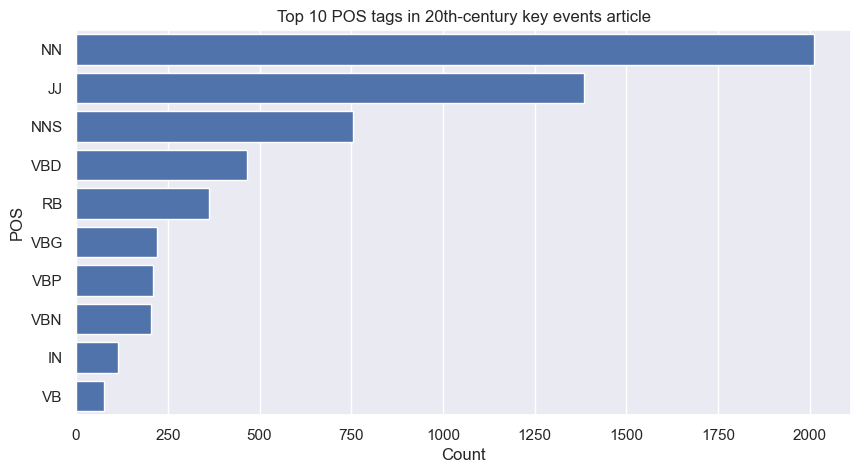

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top10_pos, x="Count", y="POS", saturation=0.9)
plt.title("Top 10 POS tags in 20th-century key events article")
plt.show()

# Comments
The most common POS tag is singular nouns (NN), followed by adjectives (JJ) and plural nouns (NNS). Again, this makes sense given the text. 

# Top 15 nouns, verbs, adjectives

In [31]:
def top_words_for_pos(df, pos_tags, n=15):
    subset = df[df["POS"].isin(pos_tags)].copy()
    counts = subset.groupby("Word").size().reset_index(name="Count")
    return counts.sort_values("Count", ascending=False).head(n)

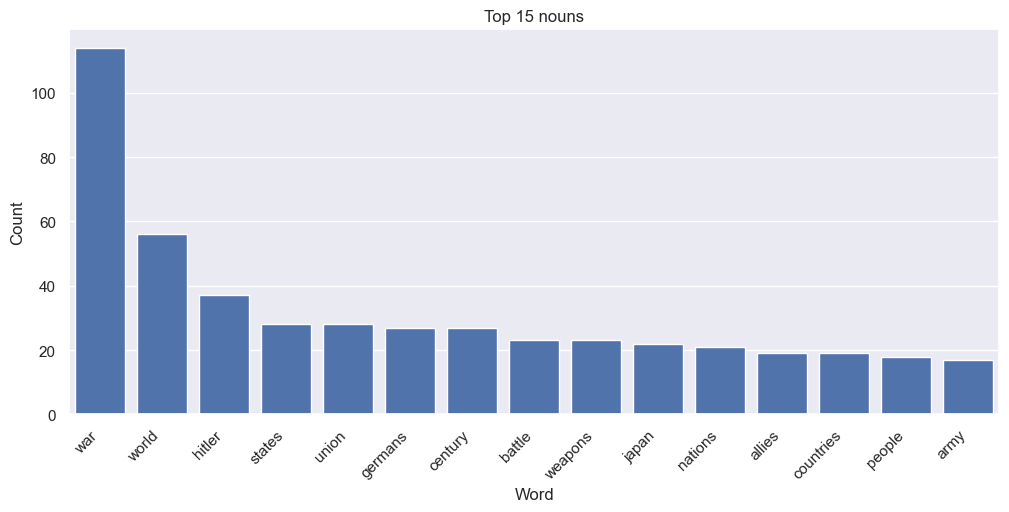

In [33]:
# Nouns Plot
noun_tags = ["NN", "NNS", "NNP", "NNPS"]
top15_nouns = top_words_for_pos(df_text, noun_tags, n=15)

plt.figure(figsize=(12, 5))
sns.barplot(data=top15_nouns, x="Word", y="Count", saturation=0.9)
plt.title("Top 15 nouns")
plt.xticks(rotation=45, ha="right")
plt.show()

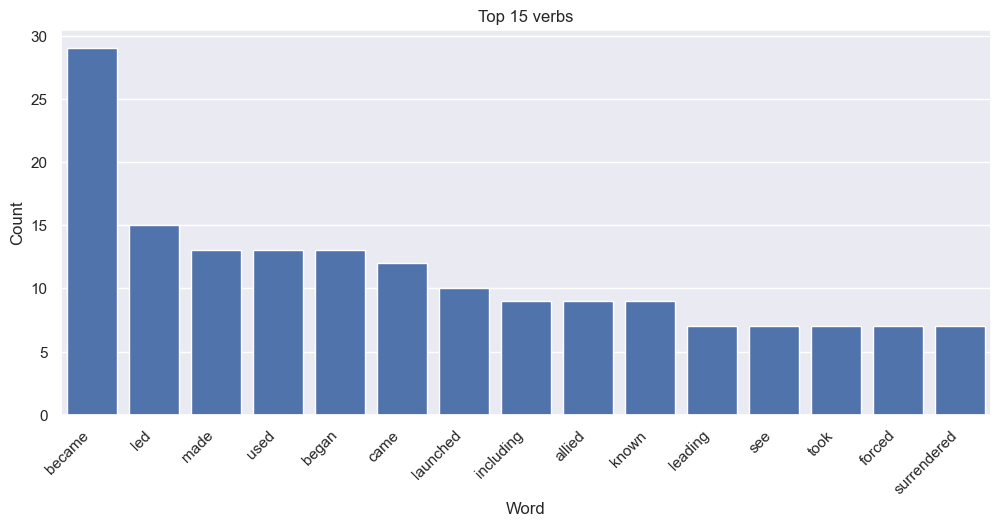

In [34]:
# Verbs Plot
verb_tags = ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
top15_verbs = top_words_for_pos(df_text, verb_tags, n=15)

plt.figure(figsize=(12, 5))
sns.barplot(data=top15_verbs, x="Word", y="Count", saturation=0.9)
plt.title("Top 15 verbs")
plt.xticks(rotation=45, ha="right")
plt.show()

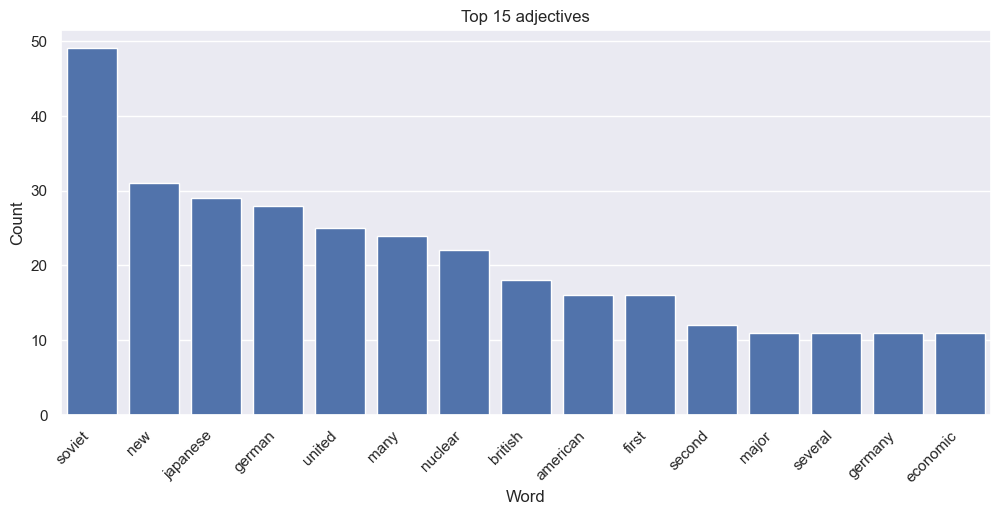

In [35]:
# Adjectives Plot
adj_tags = ["JJ", "JJR", "JJS"]
top15_adjs = top_words_for_pos(df_text, adj_tags, n=15)

plt.figure(figsize=(12, 5))
sns.barplot(data=top15_adjs, x="Word", y="Count", saturation=0.9)
plt.title("Top 15 adjectives")
plt.xticks(rotation=45, ha="right")
plt.show()

# Comments
In nouns, "war" dominates (no surprise) followed by “hitler,” “states,” “union,” “battle,” “weapons,” “allies,” “army,” and “japan" - all World War era and appropriate. Interstingly, "states" appears rather than "United States," but I'm sure that's a result of the tokenization separating the two words and having the words "states" used again in other contexts. 

In verbs, they are all mostly action (past-tense) verbs that support a narrative of events: “became,” “led,” “began,” “came,” “launched,” and “forced.”

In adjectives we find “soviet,” “japanese,” “german,” “united,” “british,” “american,” and “nuclear" - all the major actors in the World Wars. 

# Countries Dataframe and Frequencies

In [7]:
countries_df = pd.read_csv(COUNTRIES_PATH)
countries = countries_df["country"].dropna().astype(str).tolist()

len(countries), countries[:15]

(195,
 ['Afghanistan',
  'Albania',
  'Algeria',
  'Andorra',
  'Angola',
  'Antigua and Barbuda',
  'Argentina',
  'Armenia',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahamas',
  'Bahrain',
  'Bangladesh',
  'Barbados'])

In [54]:
# Count how many times each country is mentioned

text_lower = data.lower()

country_counts = []
for c in countries:
    c_clean = c.strip().lower()
    pattern = r"\b" + re.escape(c_clean) + r"\b"   # whole phrase match
    count = len(re.findall(pattern, text_lower))
    country_counts.append((c, count))

df_countries = pd.DataFrame(country_counts, columns=["Country", "Times mentioned"])
df_countries = df_countries.sort_values("Times mentioned", ascending=False).reset_index(drop=True)

df_countries.head(20)

,Country,Times mentioned
0,Germany,31
1,Japan,26
2,United States,21
3,France,14
4,Poland,12
5,China,9
6,Italy,8
7,Vietnam,7
8,Russia,7
9,India,6


In [55]:
# Let's add some common aliases to see how things change

alias_map = {
    "United States": ["United States", "U.S.", "USA", "U.S.A."],
    "Russia": ["Russia", "USSR", "U.S.S.R.", "Soviet Union"],
}

In [56]:
# recount with aliases

text_lower = data.lower()

def count_aliases(aliases, text):
    total = 0
    for a in aliases:
        a_clean = a.lower().strip()
        # handle periods in U.S. etc by escaping
        pattern = r"\b" + re.escape(a_clean) + r"\b"
        total += len(re.findall(pattern, text))
    return total

alias_counts = []
for canonical, aliases in alias_map.items():
    alias_counts.append((canonical, count_aliases(aliases, text_lower)))

df_alias = pd.DataFrame(alias_counts, columns=["Country", "Times mentioned"])
df_alias


,Country,Times mentioned
0,United States,22
1,Russia,40


In [57]:
# merge with existing df_countries

df_countries_updated = df_countries.copy()

for _, row in df_alias.iterrows():
    canonical = row["Country"]
    count = row["Times mentioned"]
    df_countries_updated.loc[df_countries_updated["Country"] == canonical, "Times mentioned"] = count

df_countries_updated = df_countries_updated.sort_values("Times mentioned", ascending=False).reset_index(drop=True)
df_countries_updated.head(20)

,Country,Times mentioned
0,Russia,40
1,Germany,31
2,Japan,26
3,United States,22
4,France,14
5,Poland,12
6,China,9
7,Italy,8
8,Vietnam,7
9,India,6


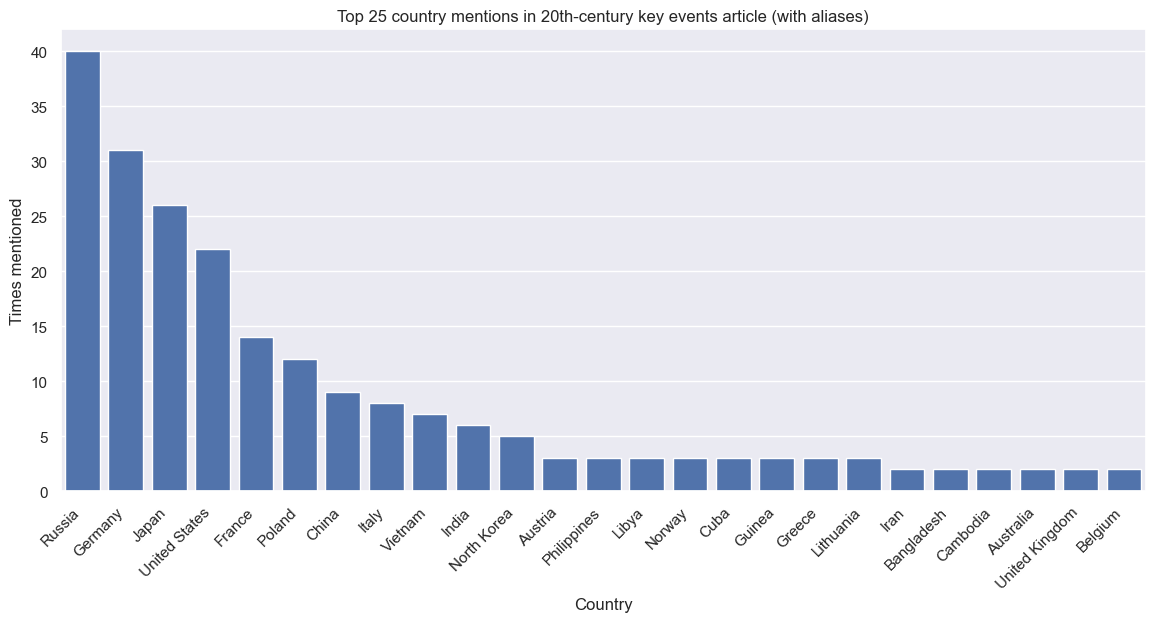

In [58]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df_countries_updated.head(25), x="Country", y="Times mentioned", saturation=0.9)
plt.title("Top 25 country mentions in 20th-century key events article (with aliases)")
plt.xticks(rotation=45, ha="right")
plt.show()

# Comments

After adding a small alias mapping for common abbreviations and historical names, the country frequency results shift in an expected way. In particular, Russia increases noticeably because references to the USSR and the Soviet Union are now counted together, which better reflects how 20th-century events are typically described in historical writing. With that adjustment, Russia becomes the most frequently mentioned country, followed by Germany and Japan.

# Sentiment Analysis

**Expectations:** Because this text summarizes wars, crises, and political conflict, I expect the overall polarity to be slightly negative. I expect subjectivity to be relatively low-to-moderate because the writing is mostly factual and descriptive rather than opinion-based.

In [59]:
blob_full = TextBlob(data)
blob_full.sentiment

Sentiment(polarity=0.05071774281330854, subjectivity=0.3802884108189918)

In [61]:
# Sentiment per sentence

sentences = sent_tokenize(data)

rows = []
for s in sentences:
    b = TextBlob(s)
    rows.append({
        "sentence": s,
        "polarity": b.sentiment.polarity,
        "subjectivity": b.sentiment.subjectivity
    })

df_sent = pd.DataFrame(rows)
df_sent.head()

,sentence,polarity,subjectivity
0,The 20th century changed the world in unpreced...,0.300000,0.450000
1,The World Wars sparked tension between countri...,-0.350000,0.700000
2,These advancements have played a significant r...,0.187500,0.437500
3,The new beginning of the 20th century marked s...,0.152841,0.482386
4,The 1900s saw the decade herald a series of in...,0.000000,0.000000


In [62]:
df_sent[["polarity", "subjectivity"]].describe()

,polarity,subjectivity
count,440.000000,440.000000
mean,0.045886,0.328320
std,0.194201,0.266593
min,-1.000000,0.000000
25%,0.000000,0.064062
50%,0.000000,0.333333
75%,0.132708,0.500000
max,0.800000,1.000000


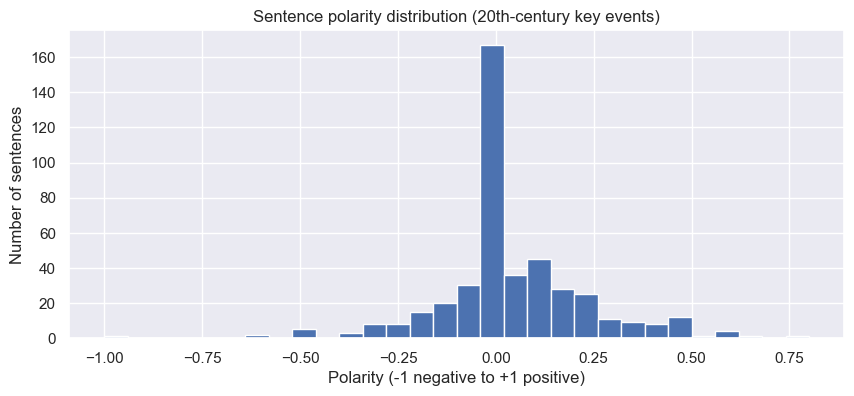

In [65]:
# Sentece Polarity Histogram

plt.figure(figsize=(10, 4))
plt.hist(df_sent["polarity"].dropna(), bins=30)
plt.title("Sentence polarity distribution (20th-century key events)")
plt.xlabel("Polarity (-1 negative to +1 positive)")
plt.ylabel("Number of sentences")
plt.show()

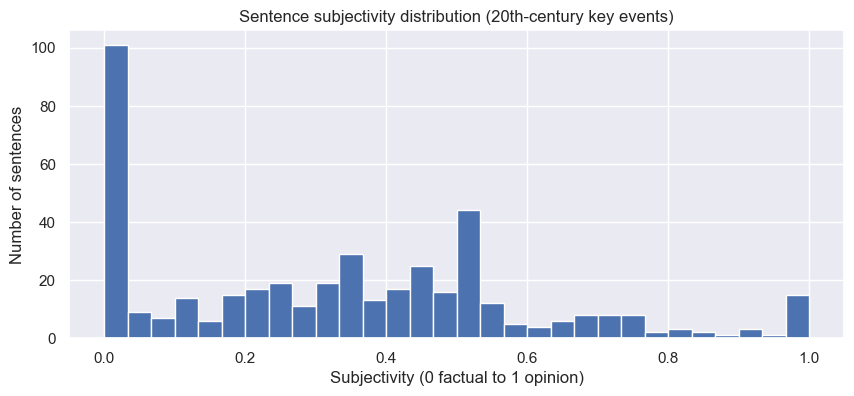

In [66]:
# Sentence Subjectivity Histogram

plt.figure(figsize=(10, 4))
plt.hist(df_sent["subjectivity"].dropna(), bins=30)
plt.title("Sentence subjectivity distribution (20th-century key events)")
plt.xlabel("Subjectivity (0 factual to 1 opinion)")
plt.ylabel("Number of sentences")
plt.show()

# Comments

The sentence polarity histogram shows a spike around 0, which means the text is mostly neutral in tone. I expected slightly negative, but it is actually slightly positive. 

The sentence subjectivity histogram shows a spike around 0, which means the text is mostly factual, which fits expectations for an account of historical events.